# 1. Data Cleaning & Preparation in Python

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load dataset
df = pd.read_csv("default_20240801.csv")

In [39]:
# Convert publishedDate to datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

In [40]:
# Add additional time columns
df['publishedMonth'] = df['publishedDate'].dt.month
df['publishedYear'] = df['publishedDate'].dt.year

In [41]:
# Simple sentiment scoring (keyword-based)
positive_words = ['love', 'great', 'amazing', 'good', 'fun', 'awesome', 'happy', 'cool', 'best']
negative_words = ['bad', 'worst', 'boring', 'hate', 'terrible', 'angry', 'sad', 'dislike']

def simple_sentiment(text):
    text = str(text).lower()
    pos = sum(word in text for word in positive_words)
    neg = sum(word in text for word in negative_words)
    score = pos - neg
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [42]:
# Apply to video titles
df['sentimentCategory'] = df['title'].apply(simple_sentiment)

In [43]:
# Check cleaned data
print(df[['title', 'sentimentCategory']].head())


                                               title sentimentCategory
0  BLESSD ❌ OVY ON THE DRUMS - MÍRAME 💜👀 (VIDEO O...           Neutral
1  It's Clash Anime Season! Happy 12th Clashivers...          Positive
2  HELLUVA SHORTS 2 // MISSION: ANTARCTICA // HEL...           Neutral
3     Brawl Stars Animation: PAINT BRAWL STARTS NOW!           Neutral
4                Tech Products That Should Not Exist           Neutral


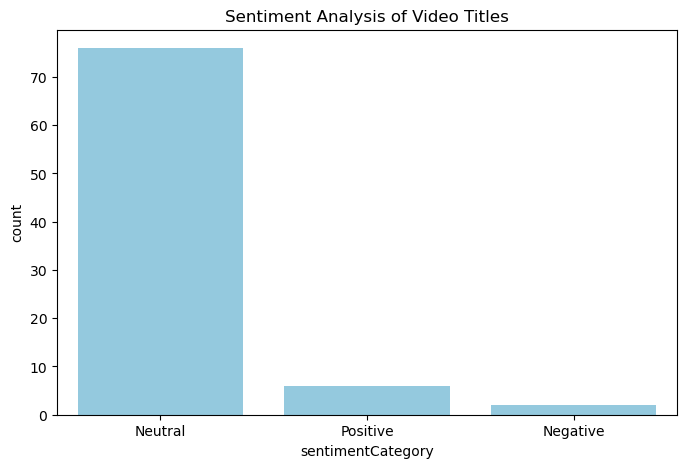

In [44]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentimentCategory', data=df, color='skyblue')
plt.title("Sentiment Analysis of Video Titles")
plt.show()

# 2.Python Visualizations (Matplotlib & Seaborn)

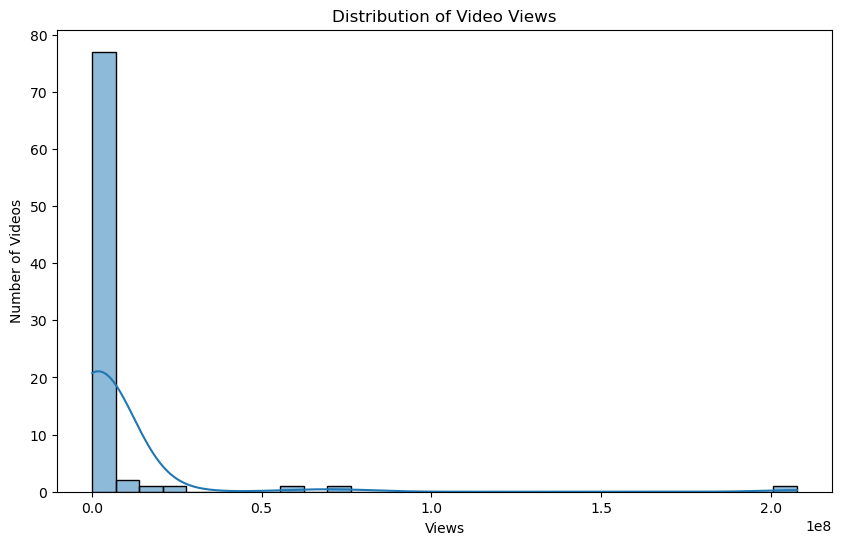

In [45]:
# Views distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=30, kde=True)
plt.title("Distribution of Video Views")
plt.xlabel("Views")
plt.ylabel("Number of Videos")
plt.show()

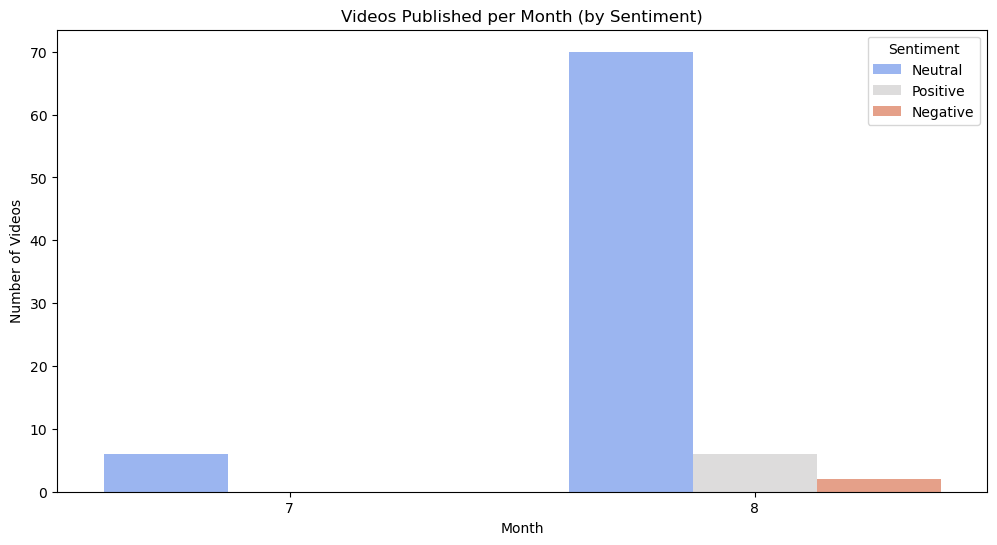

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='publishedMonth', hue='sentimentCategory', data=df, palette='coolwarm')
plt.title("Videos Published per Month (by Sentiment)")
plt.xlabel("Month")
plt.ylabel("Number of Videos")
plt.legend(title="Sentiment")
plt.show()


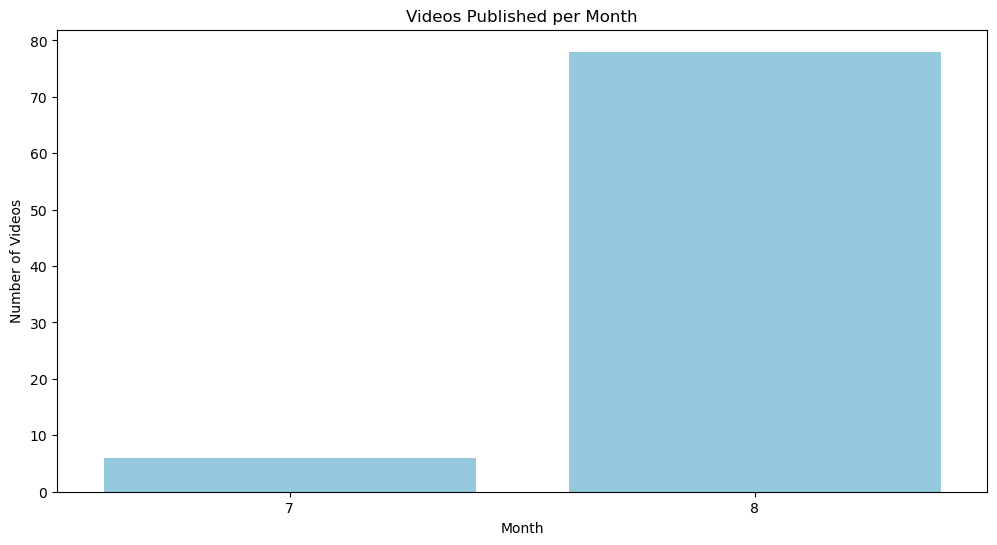

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='publishedMonth', data=df, color='skyblue')  # use a single color
plt.title("Videos Published per Month")
plt.xlabel("Month")
plt.ylabel("Number of Videos")
plt.show()

# 3. SQL Queries for Analytics

In [30]:
import pandas as pd
import sqlite3

# Load dataset
df = pd.read_csv("default_20240801.csv")

# Convert publishedDate to datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Basic sentiment scoring using keywords
positive_words = ['love', 'best', 'amazing', 'good', 'great', 'happy', 'fun', 'awesome', 'cool']
negative_words = ['bad', 'worst', 'sad', 'hate', 'terrible', 'angry', 'boring', 'dislike']

def simple_sentiment(text):
    text = str(text).lower()
    pos = sum(word in text for word in positive_words)
    neg = sum(word in text for word in negative_words)
    score = pos - neg
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to title
df['sentimentCategory'] = df['title'].apply(simple_sentiment)

# ✅ Save to SQLite
conn = sqlite3.connect(':memory:')
df.to_sql('youtube_trending', conn, index=False, if_exists='replace')

# Check if sentimentCategory exists
print(pd.read_sql_query("PRAGMA table_info(youtube_trending);", conn))


    cid               name       type  notnull dflt_value  pk
0     0              title       TEXT        0       None   0
1     1        description       TEXT        0       None   0
2     2      publishedDate  TIMESTAMP        0       None   0
3     3      publishedText       TEXT        0       None   0
4     4            videoId       TEXT        0       None   0
5     5           videoUrl       TEXT        0       None   0
6     6        channelName       TEXT        0       None   0
7     7          channelId       TEXT        0       None   0
8     8         channelUrl       TEXT        0       None   0
9     9         thumbnails       TEXT        0       None   0
10   10              views    INTEGER        0       None   0
11   11          viewsText       TEXT        0       None   0
12   12           duration    INTEGER        0       None   0
13   13       durationText       TEXT        0       None   0
14   14           verified    INTEGER        0       None   0
15   15 

### Load your dataset

In [22]:
df = pd.read_csv("default_20240801.csv")

### Connect to SQLite (in-memory database)

In [23]:
conn = sqlite3.connect(':memory:')

# Load dataframe into SQLite table
df.to_sql('youtube_trending', conn, index=False, if_exists='replace')

# Run SQL queries
query1 = """
SELECT channelName, AVG(views) AS avg_views
FROM youtube_trending
GROUP BY channelName
ORDER BY avg_views DESC
LIMIT 10;
"""

query2 = """
SELECT strftime('%Y', publishedDate) AS publishedYear,
       strftime('%m', publishedDate) AS publishedMonth,
       COUNT(*) AS video_count
FROM youtube_trending
GROUP BY publishedYear, publishedMonth
ORDER BY publishedYear, publishedMonth;
"""

query3 = """
SELECT sentimentCategory, COUNT(*) AS count_videos
FROM youtube_trending
GROUP BY sentimentCategory;
"""

# Execute queries and load results into DataFrames
avg_views_df = pd.read_sql_query(query1, conn)
time_series_df = pd.read_sql_query(query2, conn)
sentiment_df = pd.read_sql_query(query3, conn)

# Display results
print("Top Channels by Average Views:")
print(avg_views_df)

print("\nVideos Published by Year/Month:")
print(time_series_df)

print("\nSentiment Category Counts:")
print(sentiment_df)

# Close the connection
conn.close()


In [24]:
# Load dataframe into SQLite table
df.to_sql('youtube_trending', conn, index=False, if_exists='replace')

84

In [32]:
# Rank Categories by Average Views
query1 = """
SELECT channelName, AVG(views) AS avg_views
FROM youtube_trending
GROUP BY channelName
ORDER BY avg_views DESC
LIMIT 10;
"""
# Time-series: Trending Duration

query2 = """
SELECT strftime('%Y', publishedDate) AS publishedYear,
       strftime('%m', publishedDate) AS publishedMonth,
       COUNT(*) AS video_count
FROM youtube_trending
GROUP BY publishedYear, publishedMonth
ORDER BY publishedYear, publishedMonth;
"""
# Sentiment Summary (if imported sentiment data into SQL)
query3 = """
SELECT sentimentCategory, COUNT(*) AS count_videos
FROM youtube_trending
GROUP BY sentimentCategory;
"""

# Run queries
avg_views_df = pd.read_sql_query(query1, conn)
time_series_df = pd.read_sql_query(query2, conn)
sentiment_df = pd.read_sql_query(query3, conn)

# Show results
print(avg_views_df)

             channelName    avg_views
0                MrBeast  207554233.0
1    BLESSD EL BENDITO 💙   76099301.0
2      JYP Entertainment   62113441.0
3  Warner Bros. Pictures   23056446.0
4         First We Feast   18200933.0
5      Bryson DeChambeau   10121395.0
6       JaidenAnimations    8909000.0
7                    AMP    6710473.0
8                 GLITCH    6078214.0
9                    mgk    5677947.0


In [33]:
print(time_series_df)

  publishedYear publishedMonth  video_count
0          2024             07            6
1          2024             08           78


In [34]:
print(sentiment_df)

  sentimentCategory  count_videos
0          Negative             2
1           Neutral            76
2          Positive             6
